# Tugas-1

In [12]:
import pandas as pd
import math

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ZuniAmandaDewi/dataset/main/tested.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### **Menghitung Nominal/Kategorikal**

$$ d(i,j) = \frac {x-u}{a}$$

In [ ]:
data[["Pclass","Embarked"]].head(5)

,Pclass,Embarked
0,3,Q
1,3,S
2,2,Q
3,3,S
4,3,S


In [ ]:
def d1(i,j):
    P = 2
    M = 0
    for col in ["Pclass","Embarked"]:
        if data[col][i] == data[col][j]:
            M += 1
    return (P-M)/P

In [ ]:
d1(0,1)

0.5

In [ ]:
d1(2,3)

1.0

In [ ]:
d1(3,4)

0.0

### **Menghitung Biner Simetris**


$$ d(i,j) =  \frac {r+s}{q+r+s+t}$$

In [ ]:
data[["Survived","Sex"]].head(5)

,Survived,Sex
0,0,male
1,1,female
2,0,male
3,0,male
4,1,female


In [ ]:
masukan1 = "male"
masukan2 = "female"

value1 = 1
value2 = 0

def perubahan (sex):
    return value1 if sex == masukan1 else value2

In [ ]:
data["Sex"] = data["Sex"].apply(perubahan)

In [ ]:
data[["Survived","Sex"]].head(5)

,Survived,Sex
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
def d2(i,j):
    q = 0
    r = 0
    s = 0
    t = 0
    for col in ["Survived","Sex"]:
        if data[col][i] == 1 and data[col][j] == 1:
            q += 1
        elif data[col][i] == 1 and data[col][j] == 0: 
            r += 1
        elif data[col][i] == 0 and data[col][j] == 1:
            s += 1
        else:
            t += 1
    return (r+s)/(q+r+s+t)

In [ ]:
d2(0,1)

1.0

In [ ]:
d2(2,3)

0.0

In [ ]:
d2(3,4)

1.0

### **Menghitung Biner Asimetris**


$$ d(i,j)= \frac {r+s}{q+r+s}$$

In [ ]:
def d3(i,j):
    q = 0
    r = 0
    s = 0
    for col in ["Survived","Sex"]:
        if data[col][i] == 1 and data[col][j] == 1:
            q += 1
        elif data[col][i] == 1 and data[col][j] == 0: 
            r += 1
        elif data[col][i] == 0 and data[col][j] == 1:
            s += 1
    return (r+s)/(q+r+s)

In [ ]:
d3(0,1)

1.0

In [ ]:
d3(2,3)

0.0

In [ ]:
d3(3,4)

1.0

## **Menghitung Numerik**

$$ d(i,j) = \sqrt{{(Xa1-Xb1)^2}+{(Xa2-Xb2)^2}}$$

In [ ]:
data[["Ticket","Fare"]].head(5)

,Ticket,Fare
0,330911,7.8292
1,363272,7.0000
2,240276,9.6875
3,315154,8.6625
4,3101298,12.2875


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#Normalisasi Pclass
std1 = 0.841838
mean1 = 2.265550
for col1 in ["Pclass"]:
    value1 = data[col1]
    hasil1 = (value1-mean1)/std1
    print(hasil1)

# Normalisasi Fare
std2 = 55.907576
mean2 = 35.627188
for col2 in ["Fare"]:
    value2 = data[col2]
    hasil2 = (value2-mean2)/std2
    print(hasil2)

0      0.872436
1      0.872436
2     -0.315441
3      0.872436
4      0.872436
         ...   
413    0.872436
414   -1.503318
415    0.872436
416    0.872436
417    0.872436
Name: Pclass, Length: 418, dtype: float64
0     -0.497213
1     -0.512045
2     -0.463974
3     -0.482308
4     -0.417469
         ...   
413   -0.493264
414    1.310606
415   -0.507573
416   -0.493264
417   -0.237336
Name: Fare, Length: 418, dtype: float64


In [ ]:
def d4(i,j,h):
    result = 0
    for col in [hasil1, hasil2]:
        result = math.pow(abs(col[i] - col[j]), h)
    return result**(1/h)

In [ ]:
d4(0,1,2)

0.014831621388843641

In [ ]:
d4(2,3,2)

0.018333830105601412

In [ ]:
d4(3,4,2)

0.06483915525151723

##**Dissimiliarity**

In [ ]:
dTotal1 = d1(0,1) + d2(0,1) + d3(0,1) + d4(0,1,2)
dTotal2 = d1(2,3) + d2(2,3) + d3(2,3) + d4(2,3,2)
dTotal3 = d1(3,4) + d2(3,4) + d3(3,4) + d4(3,4,2)
print("Total 1 :",dTotal1)
print("Total 2 :",dTotal2)
print("Total 3 :",dTotal3)

Total 1 : 2.5148316213888435
Total 2 : 1.0183338301056013
Total 3 : 2.064839155251517


# **Tugas-2**


## Menghitung Iris

nilai2 = pd.read_csv("https://raw.githubusercontent.com/ZuniAmandaDewi/dataset/main/Iris.csv")

In [ ]:
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
nilai2[["SepalLengthCm"]].head(5)

,SepalLengthCm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [ ]:
nilai2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **menghitung Rentang**

$$ w = \frac {max-min}{k}$$

In [ ]:
def iris(min, max):
  k = 4
  w = (max - min)/k
  return (w)

In [ ]:
iris(4.3,7.9)

0.9000000000000001

### **Jarak Rentang**

$$(min + i * w)$$

In [ ]:

def rentang(i):
  min = 4.3
  v = min + i * iris(4.3,7.9)
  return (v)

In [ ]:
rentang(1)

5.2

In [ ]:
rentang(2)

6.1

In [ ]:
rentang(3)

7.0

In [ ]:
rentang(4)

7.9

In [ ]:
for col in ["SepalLengthCm"]: 
  nilai = nilai2[col]
  def equal(nilai):
    if nilai >= 4.3 and nilai < 5.2:
      return "A"
    elif nilai >= 5.2 and nilai < 6.1:
      return "B"
    elif nilai >= 6.1 and nilai < 7.0:
      return "C"
    elif nilai >= 7.0 and nilai < 7.9:
      return "D"

In [ ]:
nilai2["SepalLengthCm"] = nilai.apply(equal) 

In [ ]:
nilai2[["SepalLengthCm"]].head(150)

,SepalLengthCm
0,A
1,A
2,A
3,A
4,A
...,...
145,C
146,C
147,C
148,C


In [ ]:
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,A,3.5,1.4,0.2,Iris-setosa
1,2,A,3.0,1.4,0.2,Iris-setosa
2,3,A,3.2,1.3,0.2,Iris-setosa
3,4,A,3.1,1.5,0.2,Iris-setosa
4,5,A,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,C,3.0,5.2,2.3,Iris-virginica
146,147,C,2.5,5.0,1.9,Iris-virginica
147,148,C,3.0,5.2,2.0,Iris-virginica
148,149,C,3.4,5.4,2.3,Iris-virginica


# Tugas-3

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
print(iris.data.shape)

(150, 4)


In [18]:
X = iris.data
y = iris.target

In [19]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [21]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [22]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

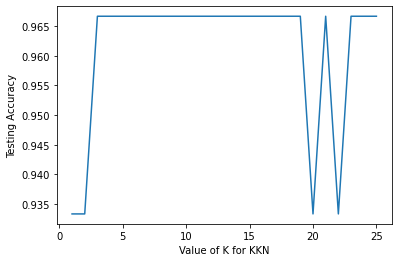

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KKN')
plt.ylabel('Testing Accuracy')

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [28]:
classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
